In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')


The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [4]:
#Q2-Get first 2 rows of data
df.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [5]:
#Q3-Check if there is missing value
print(df.isnull().sum())

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [28]:
#Q4- Get data information and number of rows and columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


(6000, 8)

In [7]:
#Q5-Get descriptive statistics of data
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


<AxesSubplot:>

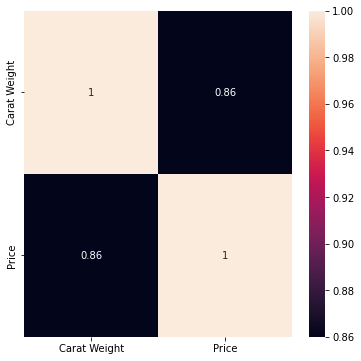

In [8]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square

import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr().round(2),ax=ax,annot=True)

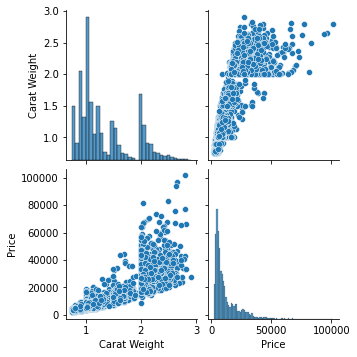

In [9]:
#Q7-Use seasoborns paiplot to generate following  diagram
sns.pairplot(df)

In [10]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
y=df['Price']
X=df.drop(['Price'], axis=1)


In [11]:
#Q9-Create dummy for the input variables (X)
X=pd.get_dummies(X)

In [12]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4800, 29)
(4800,)
(1200, 29)
(1200,)


In [13]:
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [14]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
# train data performance
import sklearn
from sklearn.linear_model import LinearRegression
df_lm = LinearRegression()
df_lm.fit(X_train, y_train)
predT=df_lm.predict(X_train)
evalmetric(y_train,predT)

MSE: 13617878.611029424
RMSE: 3690.240996334714
MAE: 2420.3923973752335
MAPE: 28.436213974145293
R-Squared: 0.8677546171602639


In [15]:
#Q11 test data evaluation
pred=df_lm.predict(X_test)
evalmetric(y_test,pred)

MSE: 16395263.359436868
RMSE: 4049.106489021605
MAE: 2386.881758705481
MAPE: 27.984324672786514
R-Squared: 0.8461544250476123


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

We can observe that R-Squared is quite high both on training and test data (about ~0.8677 on train data and about ~0.8461 on test data). Therefore, we can assume that there is no evidence of strong overfitting.

In [16]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
lasso2 = Lasso()
lasso2.fit(X_train, y_train)

Lasso()

In [17]:
predL=lasso2.predict(X_train)
evalmetric(y_train,predL)

MSE: 13620186.418222288
RMSE: 3690.5536736677177
MAE: 2418.6060989645284
MAPE: 28.3861829971279
R-Squared: 0.8677322056779423


In [18]:
predL=lasso2.predict(X_test)
evalmetric(y_test,predL)

MSE: 16397475.87123393
RMSE: 4049.379689685067
MAE: 2384.421619630618
MAPE: 27.923271021548462
R-Squared: 0.846133663859332


In [21]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
ridge2=Ridge()
ridge2.fit(X_train,y_train)

Ridge()

In [22]:
predR= ridge2.predict(X_train)
evalmetric(y_train,predR)

MSE: 13646548.843169978
RMSE: 3694.1235554824066
MAE: 2422.9559862611786
MAPE: 28.47006020332846
R-Squared: 0.8674761959807372


In [23]:
predR=ridge2.predict(X_test)
evalmetric(y_test,predR)

MSE: 16386346.26392039
RMSE: 4048.0052203425316
MAE: 2389.4522200025604
MAPE: 28.022200369524814
R-Squared: 0.8462380989512613


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why? 

From Ridge and Lasso we can see there is no significiant and substantial changes in the performance of the model. It is because Ridge and Lasso improve performance when there is overfitting by penalizing. However, in our case as there is no evidence of strong overfitting, Ridge and Lasso do not have any substantial impact on the model.


In [26]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

print('Train data')
y_pred = dtr.predict(X_train)
evalmetric(y_train,y_pred)

print('Test data')
y_pred2=dtr.predict(X_test)
evalmetric(y_test, y_pred2)

Train data
MSE: 83753.97633482143
RMSE: 289.40279254841585
MAE: 77.53468948412699
MAPE: 0.7629440866398477
R-Squared: 0.999186651828738
Test data
MSE: 4461418.225255763
RMSE: 2112.2069560665127
MAE: 894.0759246031746
MAPE: 6.990340627735729
R-Squared: 0.958136113039473


In [27]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

print('Train Data')
y_pred = rfr.predict(X_train)
evalmetric(y_train,y_pred)

print('Test Data')
y_pred2=rfr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 439838.23549114296
RMSE: 663.2030122753839
MAE: 306.6850983640665
MAPE: 2.4517404787172805
R-Squared: 0.9957286610123717
Test Data
MSE: 1368419.558707796
RMSE: 1169.794665190347
MAE: 630.4037763698802
MAPE: 5.312693170860612
R-Squared: 0.9871593832212328


Q18-Why Random forest perform better than Decison Tree on test data?

Random forest combines several decision tress and combines their predictions. Therefore, it reduces overfitting & variance, improves bias & generalization. By doing so, Random forest performs better than Decision Tree on test data.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?

Usually regression is most effective when the relationship between independent and dependent variables are linear. Lasso and Ridge regressions improve the performance of regression model by fixing the overfitting issue. 

Decision Tree and Random Forest however, are able to be effective even when the relationship between independent and dependent variables are non-linear. Random Forest combines several Decision trees together, therefore decrease the impact of overfitting and increasing generalization of the model.

In this specific model we can observe the following R-squared values:

Linear-regression: ~0.8461
Lasso: ~0.8461
Ridge: ~0.8462
Decision tree: ~0.9581
Random Forest: ~0.9871

So, we see that Random Forest performed best on this test data

